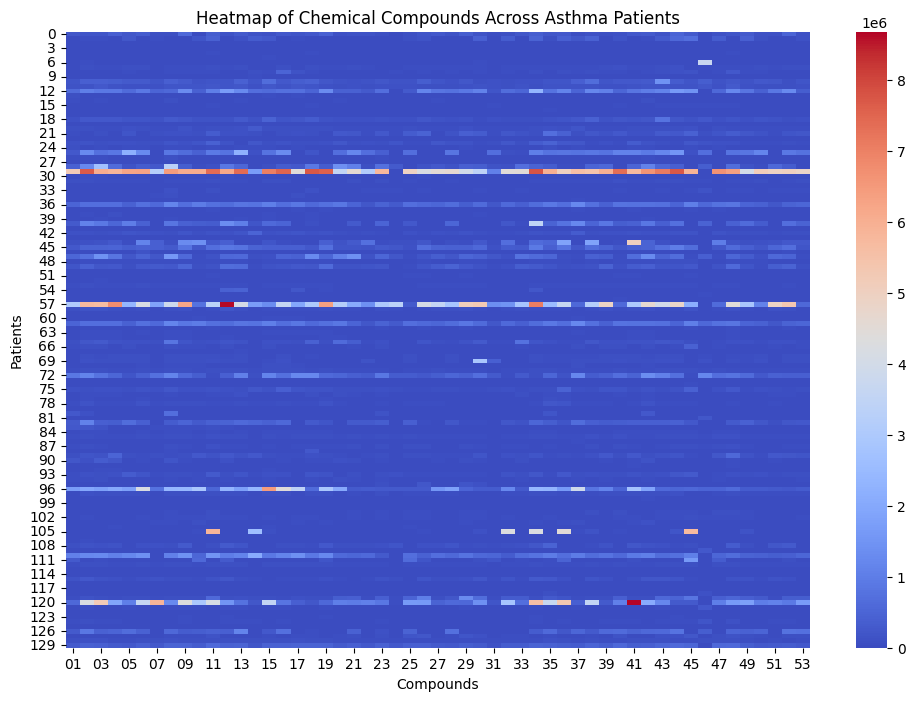

          01        02        03        04        05        06        07  \
01  1.000000  0.930772  0.852848  0.935026  0.931801  0.909730  0.594024   
02  0.930772  1.000000  0.967490  0.952344  0.905163  0.941625  0.797834   
03  0.852848  0.967490  1.000000  0.916712  0.801337  0.905432  0.845086   
04  0.935026  0.952344  0.916712  1.000000  0.857201  0.908860  0.654304   
05  0.931801  0.905163  0.801337  0.857201  1.000000  0.898499  0.589011   

          08        09        10  ...        44        45        46        47  \
01  0.926915  0.893180  0.836116  ...  0.947130  0.685328  0.053539  0.863180   
02  0.906554  0.967674  0.836673  ...  0.903655  0.611624  0.057909  0.790776   
03  0.892984  0.952788  0.775051  ...  0.807530  0.534306  0.051426  0.688823   
04  0.883613  0.957878  0.726907  ...  0.913729  0.599700  0.039839  0.702090   
05  0.870307  0.837097  0.866402  ...  0.931401  0.660686  0.065637  0.868314   

          48        49        50        51        52    

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('Asthma_peaktable_ver3.csv')

data_numeric = data.drop(columns=['pubchem_CID', 'IUPAC Name'])

plt.figure(figsize=(12, 8))
sns.heatmap(data_numeric.astype(float), cmap='coolwarm', cbar=True)
plt.title("Heatmap of Chemical Compounds Across Asthma Patients")
plt.xlabel("Compounds")
plt.ylabel("Patients")
plt.show()

correlation_matrix = data_numeric.corr()

print(correlation_matrix.head())


<Figure size 800x500 with 0 Axes>

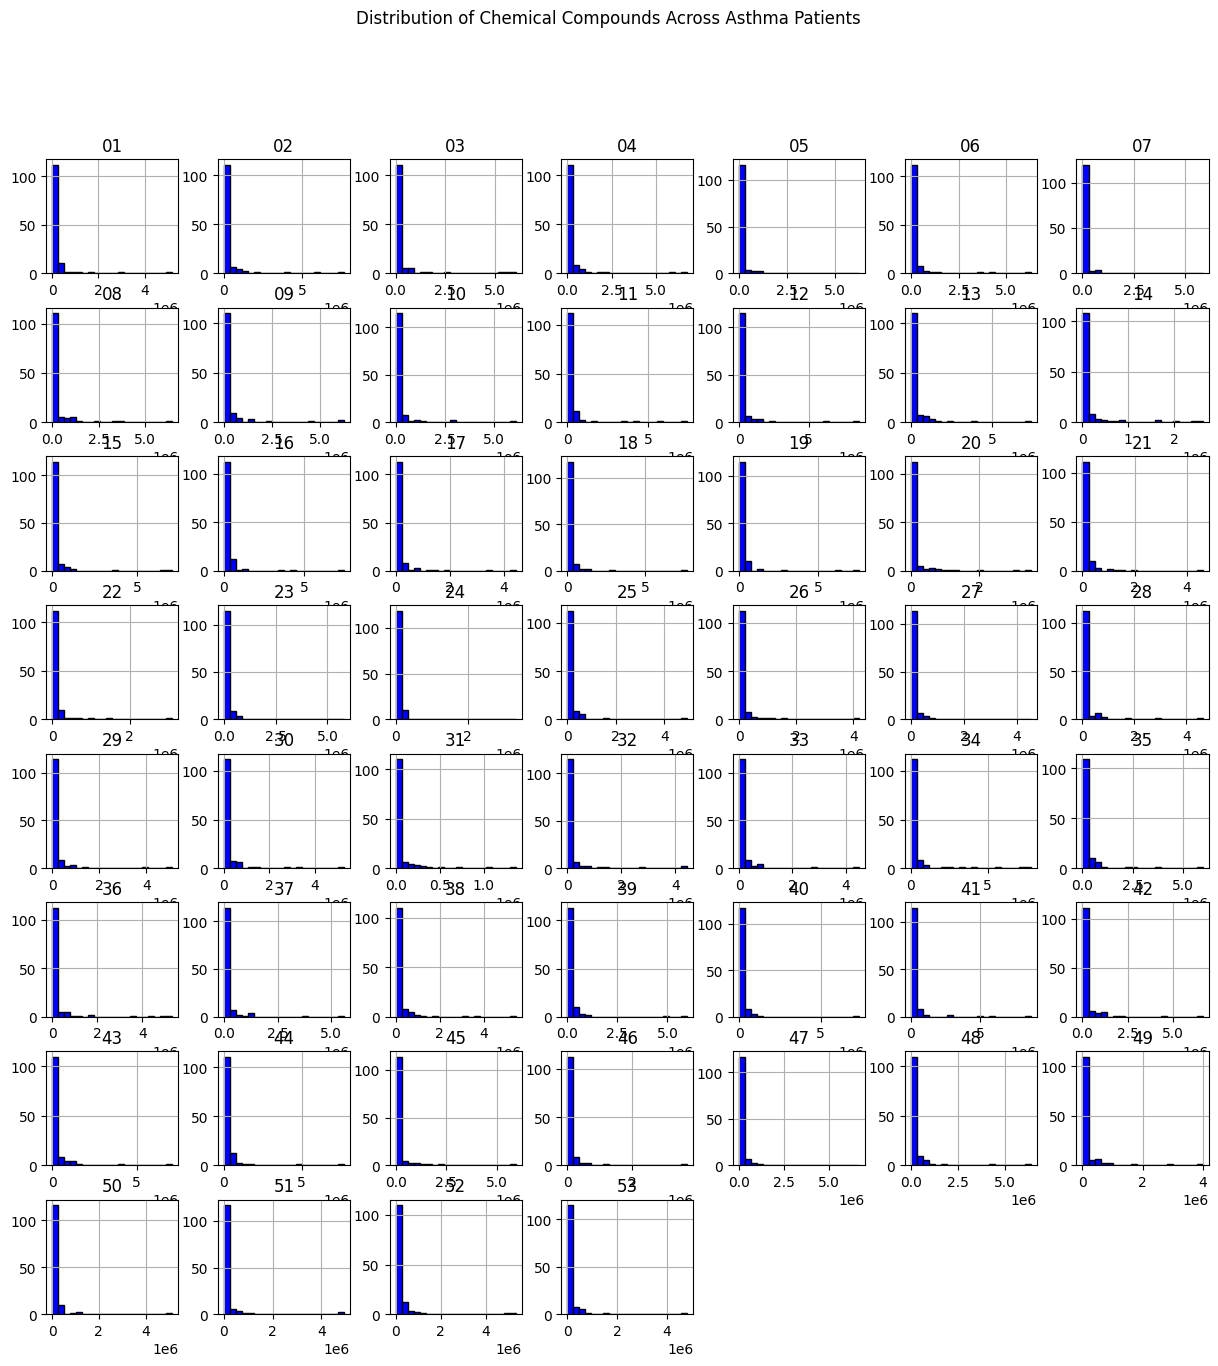

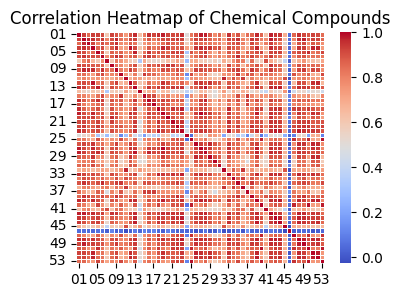

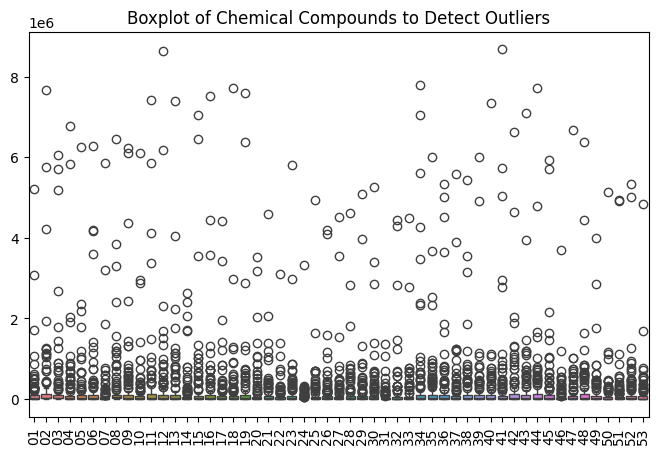

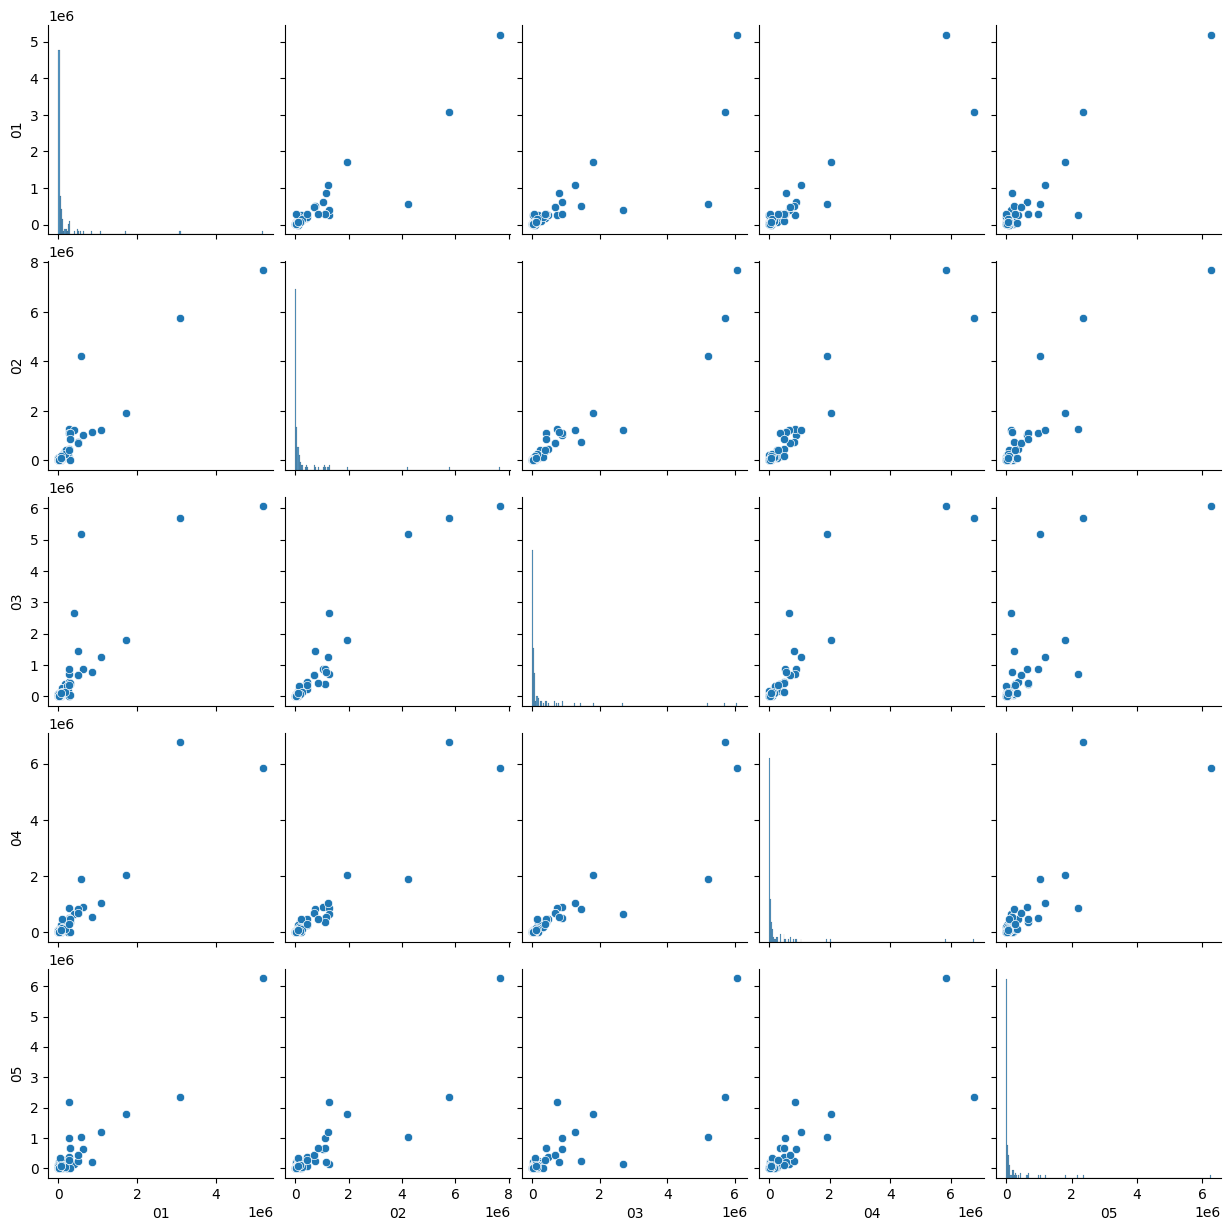

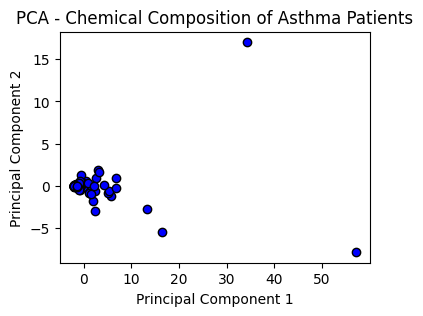

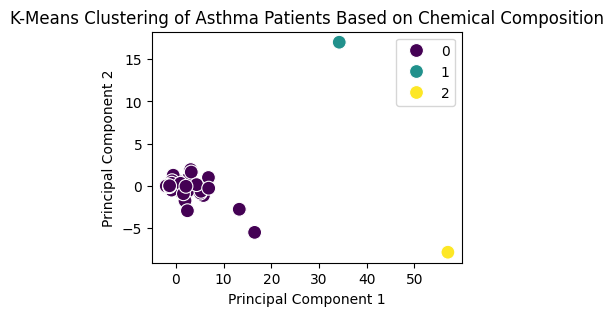

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = pd.read_csv('asthma.csv')

data_numeric = data.drop(columns=['pubchem_CID', 'IUPAC Name'])

plt.figure(figsize=(8, 5))
data_numeric.hist(bins=20, figsize=(15, 15), color='blue', edgecolor='black')
plt.suptitle('Distribution of Chemical Compounds Across Asthma Patients')
plt.show()

plt.figure(figsize=(4, 3))
correlation_matrix = data_numeric.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Chemical Compounds')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=data_numeric)
plt.title('Boxplot of Chemical Compounds to Detect Outliers')
plt.xticks(rotation=90)
plt.show()

subset = data_numeric.iloc[:, :5]  
sns.pairplot(subset)
plt.show()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(4, 3))
plt.scatter(data_pca[:, 0], data_pca[:, 1], color='blue', edgecolor='k')
plt.title('PCA - Chemical Composition of Asthma Patients')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data['Cluster'] = clusters

plt.figure(figsize=(4, 3))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('K-Means Clustering of Asthma Patients Based on Chemical Composition')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
